In [5]:
! apt-get install x11 utils > /dev/null 2>&1
! pip install pyglet > /dev/null 2>&1
! apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [6]:
import gym

In [7]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
env.reset()

106

In [9]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [10]:
! pip install gym pyvirtualdisplay > /dev/null 2>&1

In [11]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


In [12]:
! python -m pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


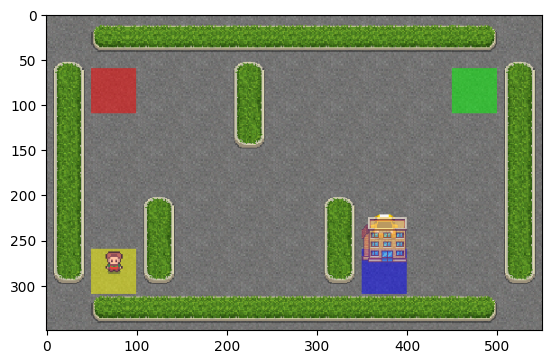

In [13]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(40):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()

  ipythondisplay.clear_output(wait=True)
  env.close()





In [14]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state= env.encode(3,1,2,0)
print("State:", state)
env.s = state

Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [15]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [16]:
env.s = 328
epoch = 0
penalties, rewards = 0, 0
frames = []
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward,
    })

    epoch += 1

    print("timesteps taken: {}".format((epoch)))
    print("penalties incured: {}".format((penalties)))


timesteps taken: 1
penalties incured: 0
timesteps taken: 2
penalties incured: 0
timesteps taken: 3
penalties incured: 0
timesteps taken: 4
penalties incured: 1
timesteps taken: 5
penalties incured: 1
timesteps taken: 6
penalties incured: 1
timesteps taken: 7
penalties incured: 2
timesteps taken: 8
penalties incured: 2
timesteps taken: 9
penalties incured: 2
timesteps taken: 10
penalties incured: 2
timesteps taken: 11
penalties incured: 3
timesteps taken: 12
penalties incured: 3
timesteps taken: 13
penalties incured: 3
timesteps taken: 14
penalties incured: 4
timesteps taken: 15
penalties incured: 4
timesteps taken: 16
penalties incured: 4
timesteps taken: 17
penalties incured: 4
timesteps taken: 18
penalties incured: 5
timesteps taken: 19
penalties incured: 5
timesteps taken: 20
penalties incured: 5
timesteps taken: 21
penalties incured: 5
timesteps taken: 22
penalties incured: 5
timesteps taken: 23
penalties incured: 5
timesteps taken: 24
penalties incured: 5
timesteps taken: 25
penal

In [17]:
from IPython.display import clear_output
from time import sleep


def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep:{i + 1}")
    print(f"State:{frame['frame']}")
    print(f"Action:{frame['action']}")
    print(f"Reward:{frame['reward']}")
    sleep(.1)
print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep:365
State:+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Action:5
Reward:20


In [18]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])


In [19]:
%%time
import random 
from IPython.display import clear_output


alpha = 0.1
gamma = 0.6
epsilon = 0.1


all_epochs = []
all_penalties = []


for i in range(1,100001):
  state = env.reset()
  
  epochs, penalties, reward, = 0,1,0

  done = False 
  while not done :
    if random.uniform(0, 1) < epsilon:
      action = np.argmax(q_table[state])
    else:
      action = np.argmax(q_table[state])

    next_state, reward, done, info = env.step(action)
    old_value = q_table[state, action]
    next_max = np.max(q_table[next_state])
    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    q_table[state, action] = new_value
    if reward == -10:
      penalties += 1


    state = next_state
    epochs += 1

if i %100==0:
  clear_output(wait=True)
  print(f"episode: {i}")

print("training finished. \n")

  


episode: 100000
training finished. 

CPU times: user 1min 3s, sys: 3.94 s, total: 1min 7s
Wall time: 1min 5s


In [20]:
q_table[328]

array([-2.32377995, -2.27325184, -2.31815921, -2.3239767 , -2.8816    ,
       -2.8816    ])

In [21]:
total_epochs, total_penalties = 0, 0
episodes = 100

for episode in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

        if done:
            total_penalties += penalties
            total_epochs += epochs

            print(f"Results after {episode + 1} episodes:")
            print(f"Average timesteps per episode: {total_epochs / (episode + 1)}")
            print(f"Average penalties per episode: {total_penalties / (episode + 1)}")


Results after 1 episodes:
Average timesteps per episode: 13.0
Average penalties per episode: 0.0
Results after 2 episodes:
Average timesteps per episode: 10.5
Average penalties per episode: 0.0
Results after 3 episodes:
Average timesteps per episode: 11.666666666666666
Average penalties per episode: 0.0
Results after 4 episodes:
Average timesteps per episode: 13.25
Average penalties per episode: 0.0
Results after 5 episodes:
Average timesteps per episode: 13.6
Average penalties per episode: 0.0
Results after 6 episodes:
Average timesteps per episode: 13.666666666666666
Average penalties per episode: 0.0
Results after 7 episodes:
Average timesteps per episode: 13.0
Average penalties per episode: 0.0
Results after 8 episodes:
Average timesteps per episode: 13.625
Average penalties per episode: 0.0
Results after 9 episodes:
Average timesteps per episode: 13.444444444444445
Average penalties per episode: 0.0
Results after 10 episodes:
Average timesteps per episode: 13.6
Average penalties p

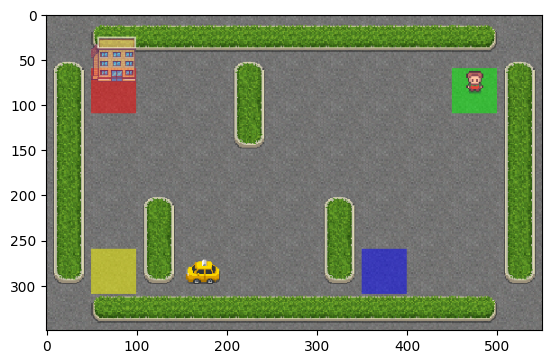

In [22]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(episodes):
  action = env.action_space.sample()
  state, penalty, done, info = env.step(action)
  screen = env.render(mode= 'rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()


ipythondisplay.clear_output(wait=True)
env.close()



